#### Import required libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import cv2 
from skimage.io import imshow, imread, imsave
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import scipy
from sklearn.model_selection import train_test_split

#### Load the images

In [72]:
# Specify the directory containing the dataset
# dataset_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset"
# label_images_dir = os.path.join(dataset_dir, "label_images_semantic")
# original_images_dir = os.path.join(dataset_dir, "original_images")

# Step 1: Load and preprocess the data
rgb_images_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images"
bw_images_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic"
color_masks_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks"
csv_file = "/home/don/Git/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv"

print("Loading the dataset...")
print(rgb_images_dir)
print(bw_images_dir)
print(color_masks_dir)
print(csv_file)

# # /home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset
# print(dataset_dir)
# # /home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic
# print(label_images_dir)
# # /home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images
# print(original_images_dir)

Loading the dataset...
/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images
/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic
/home/don/Git/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks
/home/don/Git/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv


#### Pre processing of data

In [73]:

def load_data():
    rgb_images = []
    rgb_images_names = []
    bw_images = []
    bw_images_names = []
    color_masks = []
    color_masks_names = []

    # Load RGB images
    for image_name in sorted(os.listdir(rgb_images_dir)):
        image_path = os.path.join(rgb_images_dir, image_name)
        if image_name.lower().endswith('.jpg') or image_name.lower().endswith('.jpeg'):
            label = os.path.splitext(image_name)[0]
            rgb_images.append(image_path)
            rgb_images_names.append(label)

    # Load black and white images
    for image_name in sorted(os.listdir(bw_images_dir)):
        image_path = os.path.join(bw_images_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            bw_images.append(image_path)
            bw_images_names.append(label)

    # Load color masks
    for image_name in sorted(os.listdir(color_masks_dir)):
        image_path = os.path.join(color_masks_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            color_masks.append(image_path)
            color_masks_names.append(label)

    return rgb_images, bw_images, color_masks

# Call the function to load the data
rgb_images, bw_images, color_masks = load_data()

# Print the number of images loaded
print("Number of RGB images loaded:", len(rgb_images))
print("Number of black and white images loaded:", len(bw_images))
print("Number of color masks loaded:", len(color_masks))





Number of RGB images loaded: 400
Number of black and white images loaded: 400
Number of color masks loaded: 400


#### Visualize the data

RGB image has shape: (4000, 6000, 3)
RGB image has size: 72000000
Black and white image has shape: (4000, 6000, 3)
Black and white image has size: 72000000
Color mask has shape: (4000, 6000, 3)
Color mask has size: 72000000


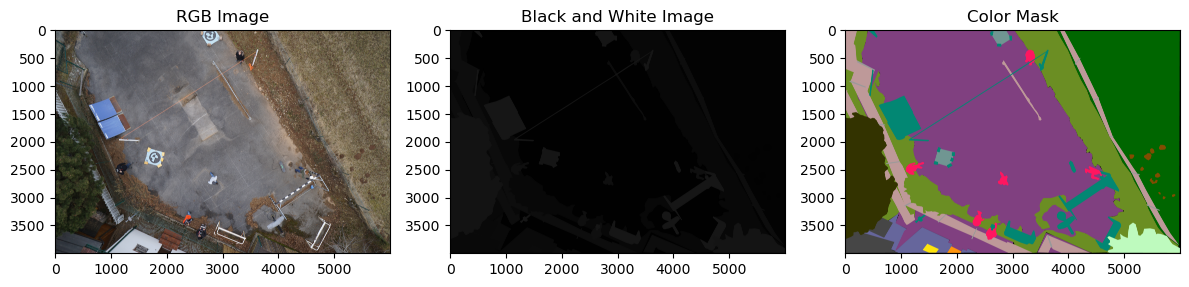

In [74]:
import matplotlib.pyplot as plt

# Select an image index to visualize
selected_index = 1

# Load the selected images
rgb_image = cv2.imread(rgb_images[selected_index])
bw_image = cv2.imread(bw_images[selected_index])
color_mask = cv2.imread(color_masks[selected_index])

# Display information about that rgb images such as size and shape
print("RGB image has shape:", rgb_image.shape)
print("RGB image has size:", rgb_image.size)

# Display information about that black and white images such as size and shape
print("Black and white image has shape:", bw_image.shape)
print("Black and white image has size:", bw_image.size)

# Display information about that color mask such as size and shape
print("Color mask has shape:", color_mask.shape)
print("Color mask has size:", color_mask.size)


# Create a figure with subplots to display the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot RGB image
axes[0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("RGB Image")

# Plot black and white image
axes[1].imshow(cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Black and White Image")

# Plot color mask
axes[2].imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
axes[2].set_title("Color Mask")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Do some pre processing on the images

Number of resized RGB images: 400
Number of resized black and white images: 400
Number of resized color masks: 400


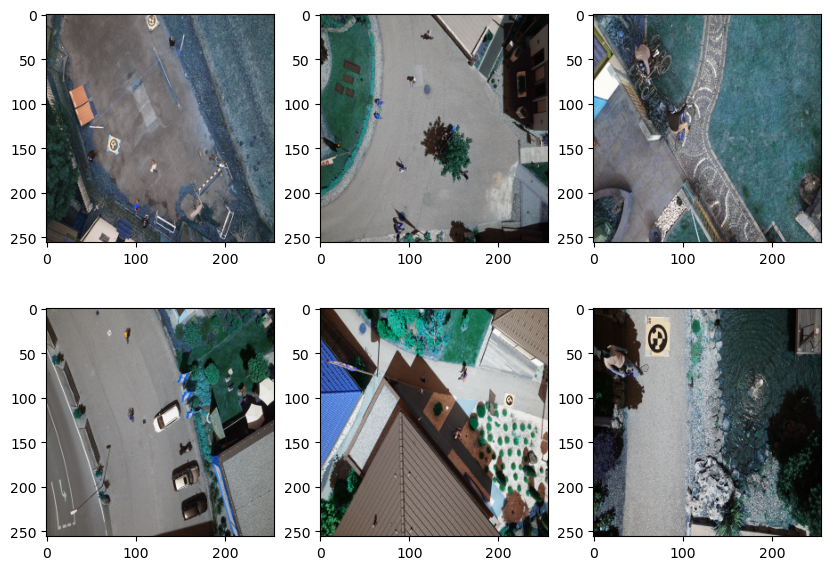

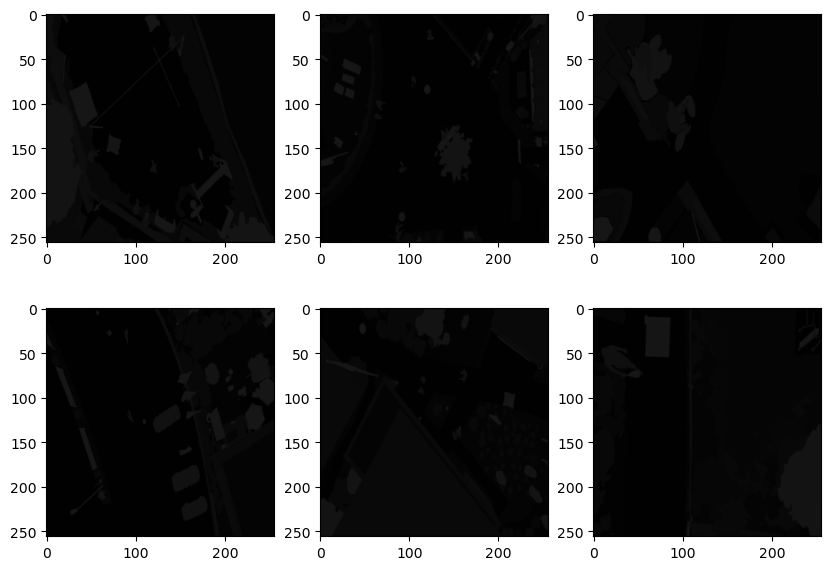

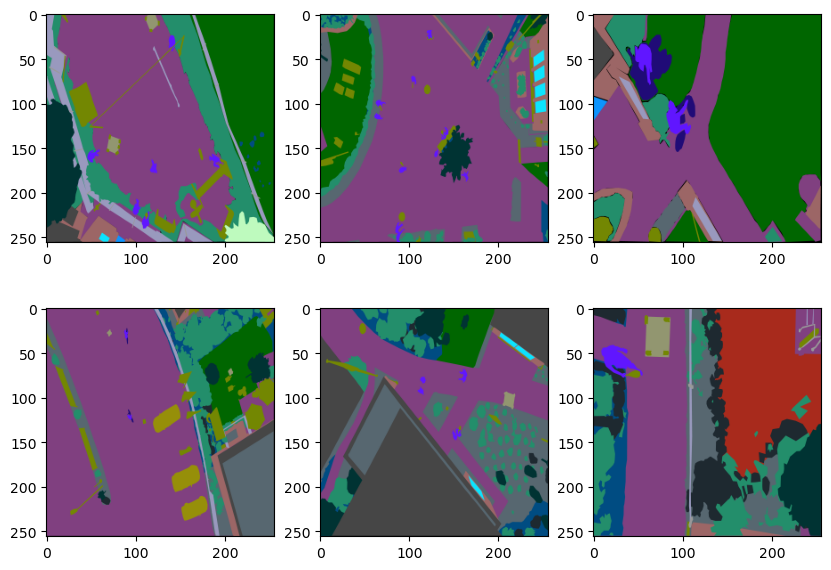

In [78]:
# Resize all the images sets to be size 256x256
def resize_images(rgb_images, bw_images, color_masks):
    resized_rgb_images = []
    resized_bw_images = []
    resized_color_masks = []

    for i in range(len(rgb_images)):
        rgb_image = cv2.imread(rgb_images[i])
        bw_image = cv2.imread(bw_images[i])
        color_mask = cv2.imread(color_masks[i])

        # Resize RGB images
        resized_rgb_image = cv2.resize(rgb_image, (256, 256), interpolation=cv2.INTER_AREA)
        resized_rgb_images.append(resized_rgb_image)

        # Resize black and white images
        resized_bw_image = cv2.resize(bw_image, (256, 256), interpolation=cv2.INTER_AREA)
        resized_bw_images.append(resized_bw_image)

        # Resize color masks
        resized_color_mask = cv2.resize(color_mask, (256, 256), interpolation=cv2.INTER_AREA)
        resized_color_masks.append(resized_color_mask)

    return resized_rgb_images, resized_bw_images, resized_color_masks

# Call the function to resize the images
resized_rgb_images, resized_bw_images, resized_color_masks = resize_images(rgb_images, bw_images, color_masks)

# Print the number of images resized
print("Number of resized RGB images:", len(resized_rgb_images))
print("Number of resized black and white images:", len(resized_bw_images))
print("Number of resized color masks:", len(resized_color_masks))

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_rgb_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_bw_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_color_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# # Convert the images to numpy arrays
# resized_rgb_images = np.array(resized_rgb_images)
# resized_bw_images = np.array(resized_bw_images)
# resized_color_masks = np.array(resized_color_masks)

# # Print the shape of the resized images
# print("Shape of resized RGB images:", resized_rgb_images.shape)
# print("Shape of resized black and white images:", resized_bw_images.shape)
# print("Shape of resized color masks:", resized_color_masks.shape)



In [88]:
# Convert this list to numpy array
resized_rgb_images = np.array(resized_rgb_images)
resized_color_masks = np.array(resized_color_masks)


test_image1 = resized_rgb_images[-1]
test_label1 = resized_color_masks[-1]
test_image2 = resized_rgb_images[-2]
test_label2 = resized_color_masks[-2]
x_train, x_val, y_train, y_val = train_test_split(resized_rgb_images[0:-2], resized_color_masks[0:-2], test_size = 0.1)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(test_label1.shape)
print(test_label2.shape)

(358, 256, 256, 3)
(358, 256, 256, 3)
(40, 256, 256, 3)
(40, 256, 256, 3)
(256, 256, 3)
(256, 256, 3)


#### Split the data into train and test sets

In [79]:
# Step 2: Prepare the training data
# the new data is resized_rgb_images, resized_bw_images, resized_color_masks
input_images = resized_rgb_images  # Use RGB images as input
output_masks = resized_color_masks  # Use color masks as output

# input_images = rgb_images  # Use RGB images as input
# output_masks = color_masks  # Use color masks as output

# Step 3: Split the data
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Split into train and test sets
train_images, test_images, train_masks, test_masks = train_test_split(input_images, output_masks, test_size=test_ratio, random_state=42)

# Further split train set into train and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)


# Convert this list to numpy array
train_images = np.array(train_images)
train_masks = np.array(train_masks)
val_images = np.array(val_images)
val_masks = np.array(val_masks)
test_images = np.array(test_images)
test_masks = np.array(test_masks)






In [80]:
# Print the number of images and masks
print("Number of train images:", len(train_images))
print("Number of train masks:", len(train_masks))
print("Number of val images:", len(val_images))
print("Number of val masks:", len(val_masks))
print("Number of test images:", len(test_images))
print("Number of test masks:", len(test_masks))

# Print the type of the train, val and test sets
print("Type of train images:", type(train_images))
print("Type of train masks:", type(train_masks))
print("Type of val images:", type(val_images))
print("Type of val masks:", type(val_masks))
print("Type of test images:", type(test_images))
print("Type of test masks:", type(test_masks))

# Print the shape of the train, val and test sets
print("Shape of train images:", train_images.shape)
print("Shape of train masks:", train_masks.shape)
print("Shape of val images:", val_images.shape)
print("Shape of val masks:", val_masks.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test masks:", test_masks.shape)


Number of train images: 279
Number of train masks: 279
Number of val images: 81
Number of val masks: 81
Number of test images: 40
Number of test masks: 40
Type of train images: <class 'numpy.ndarray'>
Type of train masks: <class 'numpy.ndarray'>
Type of val images: <class 'numpy.ndarray'>
Type of val masks: <class 'numpy.ndarray'>
Type of test images: <class 'numpy.ndarray'>
Type of test masks: <class 'numpy.ndarray'>
Shape of train images: (279, 256, 256, 3)
Shape of train masks: (279, 256, 256, 3)
Shape of val images: (81, 256, 256, 3)
Shape of val masks: (81, 256, 256, 3)
Shape of test images: (40, 256, 256, 3)
Shape of test masks: (40, 256, 256, 3)


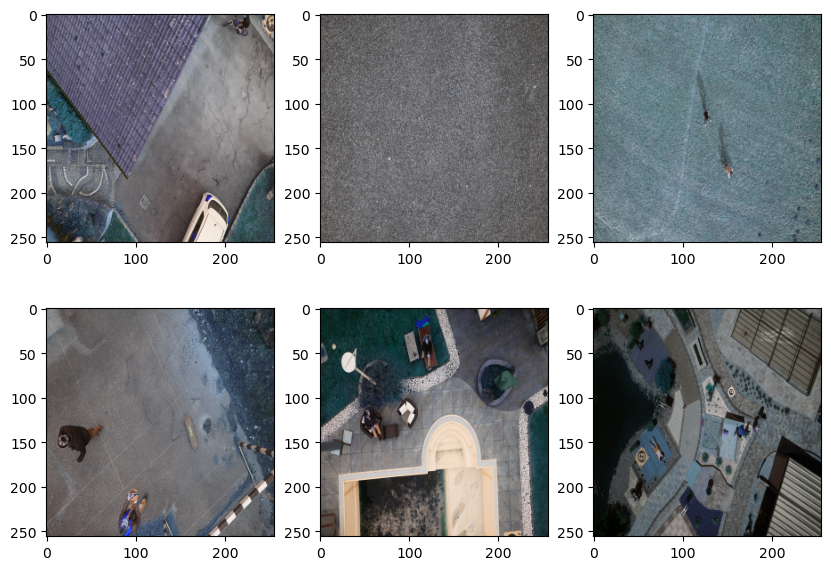

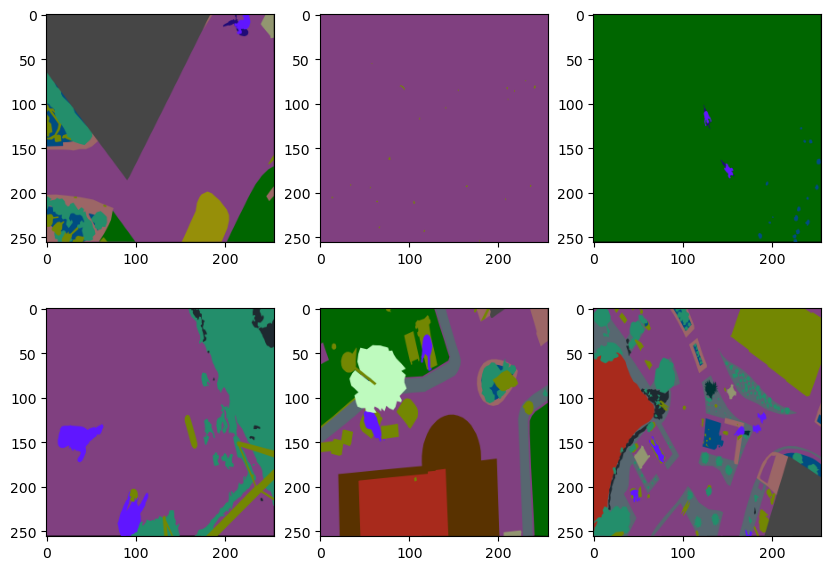

<Figure size 1000x700 with 0 Axes>

In [81]:
# Visualise some of the images from each of train images, val images and test images and their corresponding masks
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2

for i in range(1, columns*rows +1):
    img = train_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2


#### U - Net Model

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

# imports
import time
from time import process_time
import numpy as np
import numpy
import scipy.io
import cv2
from tensorboard import notebook
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize
from skimage.color import convert_colorspace
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

In [83]:


# Step 4: Train a U-Net model
def unet_model():
    num_channels = 3
    # Define the U-Net architecture
    inputs = Input((image_height, image_width, num_channels))
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = Conv2D(num_classes, 3, activation='softmax', padding='same')(conv9)

    model = Model(inputs=inputs, outputs=conv9)
    return model

# Specify the dimensions by using the image
image_height = train_images[0].shape[0]
image_width = train_images[0].shape[1]
num_classes = 3

# Create an instance of the U-Net model
unet_model_created = unet_model()

# Print the model summary
unet_model_created.summary()



Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_115 (Conv2D)            (None, 256, 256, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_116 (Conv2D)            (None, 256, 256, 64  36928       ['conv2d_115[0][0]']             
                                )                                                           

In [84]:
def train_and_eval(model, train, train_y, test, test_y):

    # compile the network
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    # fit the model
    # make the batch size smaller
    # increase the epochs number of iterations of the dataset
    # add decay rate for epoch
    history = model.fit(train, train_y,
                        batch_size=16,
                        epochs=1,
                        validation_data=(test, test_y),
                        verbose=False)
    

    # plot training and validation loss and accuracy
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()

    # plot confusion matrices and F1 scores
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    pred = model.predict(train, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(train_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

    ax = fig.add_subplot(1, 2, 2)    
    pred = model.predict(test, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(test_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))
     

In [85]:
import time
from time import process_time

InvalidArgumentError: {{function_node __wrapped__ScatterNd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Dimensions [0,3) of indices[shape=[279,2,256,3]] must match dimensions [0,3) of updates[shape=[279,256,3]] [Op:ScatterNd]

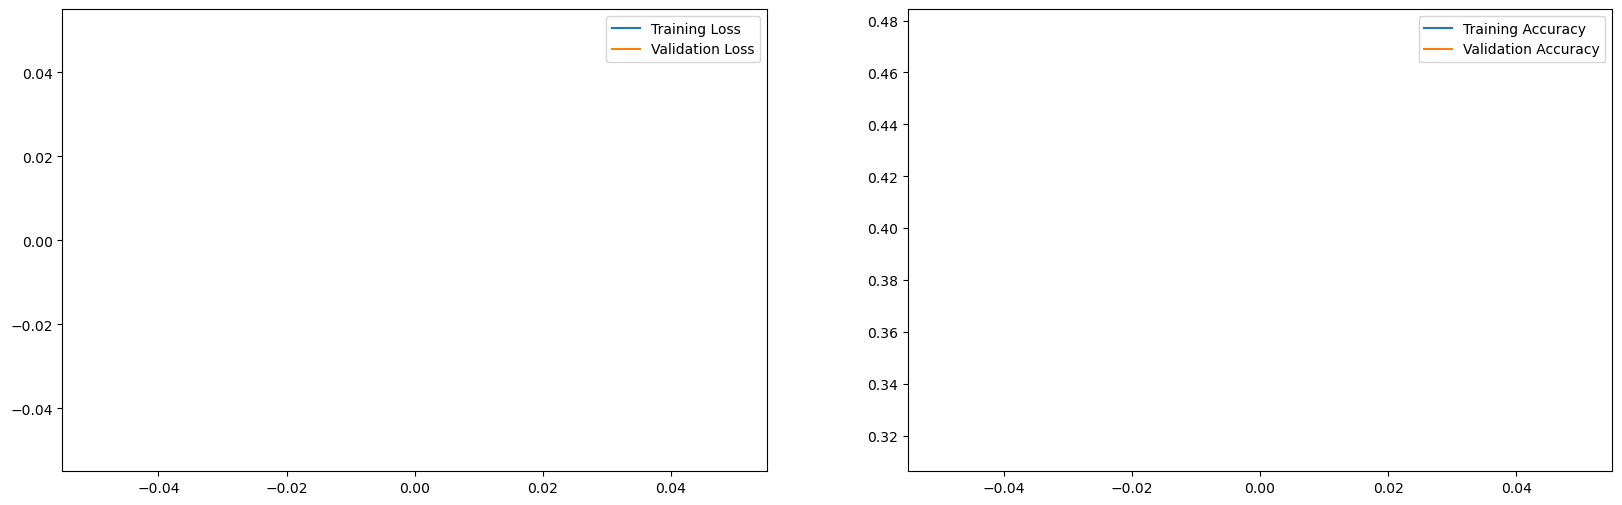

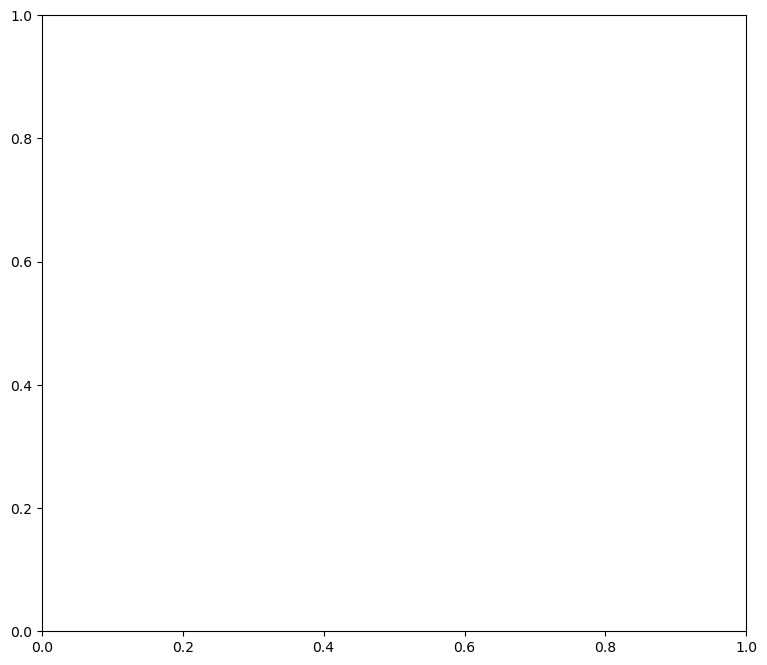

In [86]:
without_aug_start = process_time()
train_and_eval(unet_model_created, train_images, train_masks, test_images, test_masks) 
without_aug_stop = process_time()
print('Time to train and evaluate without augmentation: %f' % (without_aug_stop - without_aug_start))